## Supervised Learning Final Result

Number of source test samples:  84
e_M_Source =  0.14818102374561068
Ridge (L2) Regression
Training MSE: 2.455
Test MSE: 3.101 
Test Error: 1.389
Generalization Error bound: <= 1.537


[-0.14962212 -0.75869104  1.07706585  1.59609722  3.34387172  3.38916929
  1.18577412  2.44203587  3.2303528   3.46509007]
R^2:  0.6121102352951218


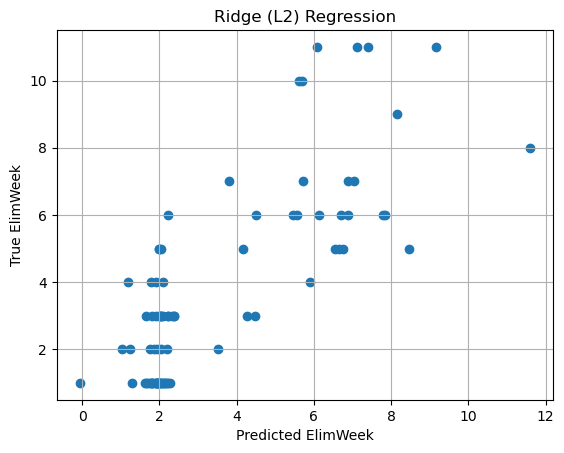

In [1]:
import pickle
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from utils import *
import matplotlib.pyplot as plt


# SL System Results
df_bachelor = pd.read_csv("data_processed/bachelor_preprocessed.csv")
X,y = encode_data(df_bachelor)

# Split the training, validation, test data
np.random.seed(100)

#default is trainsize=0.7, valsize=0.1, testsize=0.2
X_train, y_train, X_val, y_val, X_test, y_test = split_data(X,y)

# Combine training and validation into a new training set for final test performance
y_train_combined = pd.concat([y_train, y_val])
X_train_combined  = pd.concat([X_train, X_val])

#standardize values based on training statistics
X_test = standardize_data(X_train_combined, X_test)
X_train_combined = standardize_data(X_train_combined, X_train_combined)

X_test_S = X_test
X_train_combined_S = X_train_combined
y_test_S = y_test
y_train_combined_S = y_train_combined
X_val_S = X_val
y_val_S = y_val
X_train_S = X_train
y_train_S = y_train
X_S = X

#calculate e_M for generalization bound\
M=1
N_Source = len(y_test_S)
delta = 0.05
e_M_Source = np.sqrt((1/(2*N_Source))*np.log(2*M/delta))
print("Number of source test samples: ", N_Source)
print("e_M_Source = ", e_M_Source)


#Load model and print metrics
filename = 'SL_final_model_Ridge.pickle'
model_SL = pickle.load(open(filename, 'rb'))
y_pred = model_SL.predict(X_test)
y_pred_train = model_SL.predict(X_train_combined)
print("Ridge (L2) Regression")
print_metrics(y_pred, y_test, y_pred_train, y_train_combined, e_M_Source)
print(model_SL.coef_)
print("R^2: ", model_SL.score(X_test, y_test))
plot_scatter_pred_true(y_pred, y_test, "Ridge (L2) Regression")


## Transfer Learning Final Result

Number of target test samples:  57
Transfer Learning: TrAdaBoostR2 with Ridge
Training MSE: 5.283
Test MSE: 7.362 
Test Error: 2.045


[2.38182541e-10 1.28415343e-03 9.00947542e-04 4.72513137e-10
 2.84747476e-08 5.50949497e-10 7.61064968e-07 5.55084665e-09
 6.32094620e-04 1.41592862e-03 7.24834434e-09 4.14631448e-08
 1.45391208e-03 2.95838137e-10 5.30013045e-03 5.50949497e-10
 9.51967129e-09 5.68812847e-09 4.43470446e-04 3.80215073e-07
 1.53475406e-02 8.89376950e-11 1.43903465e-06 1.05282123e-02
 2.99163400e-08 2.55085041e-03 3.59238113e-06 5.01025201e-06
 8.36900738e-11 2.84261295e-11 4.92705609e-10 8.66284798e-08
 9.78713505e-10 8.12860357e-07 1.41711999e-10 7.02271296e-10
 8.53490828e-05 2.44670207e-10 2.38697692e-01 3.41398814e-11
 1.96945608e-07 1.65139424e-06 1.25559671e-03 1.18503448e-07
 2.01817477e-03 5.70293646e-07 4.59385053e-11 1.25938522e-11
 7.07052092e-11 2.80713766e-07 1.70023430e-10 1.54616755e-06
 1.11930028e-09 1.12745745e-09 3.74078313e-04 3.43407455e-07
 5.01025201

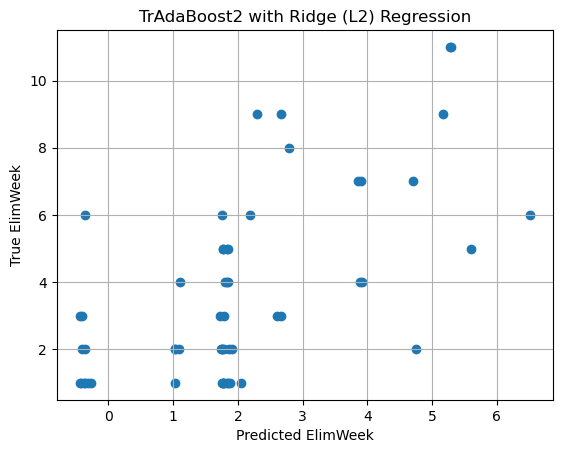

In [2]:
# TL System Results
df_bachelorette = pd.read_csv("data_processed/bachelorette_preprocessed.csv")
X,y = encode_data(df_bachelorette)

# Split the training, validation, test data
np.random.seed(15)

#default is trainsize=0.7, valsize=0.1, testsize=0.2
X_train, y_train, X_val, y_val, X_test, y_test = split_data(X,y)

# Combine training and validation into a new training set for final test performance
y_train_combined = pd.concat([y_train, y_val])
X_train_combined  = pd.concat([X_train, X_val])

#standardize values based on training statistics
X_test = standardize_data(X_train_combined, X_test)
X_train_combined = standardize_data(X_train_combined, X_train_combined)

X_test_T = X_test
X_train_combined_T = X_train_combined
y_test_T = y_test
y_train_combined_T = y_train_combined
X_val_T = X_val
y_val_T = y_val
X_train_T = X_train
y_train_T = y_train
X_T = X

N_Target = len(y_test_T)
print("Number of target test samples: ", N_Target)

#Load model and print metrics
filename = 'TL_final_model_TrAdaBoost.pickle'
model_TF = pickle.load(open(filename, 'rb'))
y_pred = model_TF.predict_estimator(X_test_T)
y_pred_train = model_TF.predict(X_train_combined_S)
test_mse = mean_squared_error(y_test_T, y_pred)
print("Transfer Learning: TrAdaBoostR2 with Ridge")
print_metrics(y_pred, y_test_T, y_pred_train, y_train_combined_S)
print(model_TF.predict_weights("target"))
print("R^2: ", model_TF.score(X_test_T, y_test_T))
plot_scatter_pred_true(y_pred, y_test_T, "TrAdaBoost2 with Ridge (L2) Regression")

